# importing libraries

In [8]:
import pandas as pd
import numpy as np
import tweepy
import re
import os 
import json
import requests
import seaborn
import matplotlib.pyplot as plt  
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Gathering Data

In [9]:
# 1- GATHER DATA FROM twitter-archive-enhanced

In [10]:
archive_df =pd.read_csv("twitter-archive-enhanced.csv")

In [11]:
# 2- GATHER DATA FROM image-predictions url

In [12]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open("image-predictions.tsv",mode='wb') as file:
    file.write(response.content)

In [13]:
image_predictions_df=pd.read_csv("image-predictions.tsv",sep="\t")

In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [15]:
# 3- GATHER DATA FROM tweet-json.txt

In [16]:
df_list=[]
file = open('tweet-json.txt', 'r') 
for line in file:
    result_dict = json.loads(line) 
    tweet_id=result_dict['id']
    retweet_count=result_dict['retweet_count']
    favourite_count=result_dict['favorite_count']
    df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favourite_count})
api_df=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])


# View data

In [17]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# info method

In [23]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
archive_df['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

# Assess Data

# QUALTIY DIMENSIONS

 1- completeness

- missing values in ( retweeted_status_id ,retweeted_status_user_id,retweeted_status_timestamp)
- missing values in in_reply_to_status_id
- missing values in in_reply_to_user_id
- the tweets that do not have pictures (archive_df , image_prediction_df)
- dropping the retweets from the archive_df set , image_predictions_df and api_df sets

2- validity

- In Table (image_predictions_df, archive_df) tweet_id is a string not a integer 
- In Table ( api_df ) tweet_id is a integer not a string 
- In Table (archive_df)  rating_denominator column is invalid 

3- accurancy

- in table archive_df Erroneous datatype ( timestamp )

4- Data types(consistency issues):

- in table archive_df ( doggo - floofer - pupper - puppo) convert values (None)  to ( nan values ) 

# Tidiness 

- in table Archive_df values are column names ( doggo - floofer - pupper - puppo)
- image_predictions of the type Column headers are values, not variable names.
- tweet_id columns in 'archive_df' table duplicated in 'image_predictions_df' and 'api_df' tables

# Cleaning Of Data

In [27]:
archive_df_clean = archive_df.copy()
image_predictions_df_clean =image_predictions_df.copy()
api_df_clean = api_df.copy()

Define

Drop rows ( in_reply_to_status_id, retweeted_status_id) when tweet_id equal it from tables ("archive_df_clean","image_predictions_df_clean", "api_df_clean")

Code

In [28]:
replay = archive_df_clean.in_reply_to_status_id
retweeted = archive_df_clean.retweeted_status_id
replay.dropna(inplace = True)
retweeted.dropna(inplace = True)

for i in replay.values:
    archive_df_clean = archive_df_clean[archive_df_clean.tweet_id != i]
    image_predictions_df_clean = image_predictions_df_clean[image_predictions_df_clean.tweet_id != i]
    api_df_clean = api_df_clean[api_df_clean.tweet_id != i]
    
for i in retweeted.values:
    archive_df_clean = archive_df_clean[archive_df_clean.tweet_id != i]
    image_predictions_df_clean = image_predictions_df_clean[image_predictions_df_clean.tweet_id != i]
    api_df_clean = api_df_clean[api_df_clean.tweet_id != i]
    
archive_df_clean.info()
image_predictions_df_clean.info()
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2162 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2162 non-null   object 
 4   source                      2162 non-null   object 
 5   text                        2162 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2103 non-null   object 
 10  rating_numerator            2162 non-null   int64  
 11  rating_denominator          2162 non-null   int64  
 12  name                        2162 non-null   object 
 13  doggo                       2162 

Test

In [29]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2162 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2162 non-null   object 
 4   source                      2162 non-null   object 
 5   text                        2162 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2103 non-null   object 
 10  rating_numerator            2162 non-null   int64  
 11  rating_denominator          2162 non-null   int64  
 12  name                        2162 non-null   object 
 13  doggo                       2162 

##### Define
Drop in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id

code

In [30]:
archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True) 

test

In [31]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2162 non-null   int64 
 1   timestamp           2162 non-null   object
 2   source              2162 non-null   object
 3   text                2162 non-null   object
 4   expanded_urls       2103 non-null   object
 5   rating_numerator    2162 non-null   int64 
 6   rating_denominator  2162 non-null   int64 
 7   name                2162 non-null   object
 8   doggo               2162 non-null   object
 9   floofer             2162 non-null   object
 10  pupper              2162 non-null   object
 11  puppo               2162 non-null   object
dtypes: int64(3), object(9)
memory usage: 219.6+ KB


In [32]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Define


 delete the tweets that do not have pictures (archive_df , image_prediction_df)

code

In [33]:
archive_df_clean= (archive_df_clean[archive_df_clean.tweet_id.isin(image_predictions_df_clean.tweet_id)])

test

In [34]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1896 non-null   int64 
 1   timestamp           1896 non-null   object
 2   source              1896 non-null   object
 3   text                1896 non-null   object
 4   expanded_urls       1896 non-null   object
 5   rating_numerator    1896 non-null   int64 
 6   rating_denominator  1896 non-null   int64 
 7   name                1896 non-null   object
 8   doggo               1896 non-null   object
 9   floofer             1896 non-null   object
 10  pupper              1896 non-null   object
 11  puppo               1896 non-null   object
dtypes: int64(3), object(9)
memory usage: 192.6+ KB


Define

 dropping the retweets from the archive_df_clean set , image_predictions_df_clean and api_df_clean

code

In [35]:
image_predictions_df_clean = image_predictions_df_clean[~((image_predictions_df_clean.tweet_id.duplicated()) 
                                                          & image_predictions_df_clean.tweet_id.notnull())]
archive_df_clean = archive_df_clean[~((archive_df_clean.tweet_id.duplicated()) 
                                                          & archive_df_clean.tweet_id.notnull())]
api_df_clean = api_df_clean[~((api_df_clean.tweet_id.duplicated()) 
                                                          & api_df_clean.tweet_id.notnull())]

test

In [36]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2160 non-null   int64
 1   retweet_count   2160 non-null   int64
 2   favorite_count  2160 non-null   int64
dtypes: int64(3)
memory usage: 67.5 KB


Define

convert tweet_id in (image_predictions_df_clean,archive_df_clean) from integer to string

Code

In [37]:
image_predictions_df_clean['tweet_id']=image_predictions_df_clean['tweet_id'].astype(str)
archive_df_clean['tweet_id']=archive_df_clean['tweet_id'].astype(str)
api_df_clean['tweet_id']=api_df_clean['tweet_id'].astype(str)

Test

In [38]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1896 non-null   object 
 1   jpg_url   1896 non-null   object 
 2   img_num   1896 non-null   int64  
 3   p1        1896 non-null   object 
 4   p1_conf   1896 non-null   float64
 5   p1_dog    1896 non-null   bool   
 6   p2        1896 non-null   object 
 7   p2_conf   1896 non-null   float64
 8   p2_dog    1896 non-null   bool   
 9   p3        1896 non-null   object 
 10  p3_conf   1896 non-null   float64
 11  p3_dog    1896 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 153.7+ KB


In [39]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1896 non-null   object
 1   timestamp           1896 non-null   object
 2   source              1896 non-null   object
 3   text                1896 non-null   object
 4   expanded_urls       1896 non-null   object
 5   rating_numerator    1896 non-null   int64 
 6   rating_denominator  1896 non-null   int64 
 7   name                1896 non-null   object
 8   doggo               1896 non-null   object
 9   floofer             1896 non-null   object
 10  pupper              1896 non-null   object
 11  puppo               1896 non-null   object
dtypes: int64(2), object(10)
memory usage: 192.6+ KB


Define

Remove values not equal 10 in rating_denominator column in archive_df_clean table

Code

In [40]:
archive_df_clean=archive_df_clean[archive_df_clean['rating_denominator'] == 10]

Test

In [41]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1880 non-null   object
 1   timestamp           1880 non-null   object
 2   source              1880 non-null   object
 3   text                1880 non-null   object
 4   expanded_urls       1880 non-null   object
 5   rating_numerator    1880 non-null   int64 
 6   rating_denominator  1880 non-null   int64 
 7   name                1880 non-null   object
 8   doggo               1880 non-null   object
 9   floofer             1880 non-null   object
 10  pupper              1880 non-null   object
 11  puppo               1880 non-null   object
dtypes: int64(2), object(10)
memory usage: 190.9+ KB


Define

convert timestamp in archive_df_clean from string to datatime

Code

In [42]:
archive_df_clean['timestamp'] = archive_df_clean['timestamp'].astype('datetime64[ns]')

Test

In [43]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Define

convert values (None) ( doggo - floofer - pupper - puppo) to ( nan values ) in table archive_df_clean

Code

In [44]:
archive_df_clean.replace(to_replace='None', value= np.nan, inplace = True)

test

In [45]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1880 non-null   object        
 1   timestamp           1880 non-null   datetime64[ns]
 2   source              1880 non-null   object        
 3   text                1880 non-null   object        
 4   expanded_urls       1880 non-null   object        
 5   rating_numerator    1880 non-null   int64         
 6   rating_denominator  1880 non-null   int64         
 7   name                1363 non-null   object        
 8   doggo               69 non-null     object        
 9   floofer             8 non-null      object        
 10  pupper              202 non-null    object        
 11  puppo               20 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 190.9+ KB


Define

table archive_df_clean values are column names ( doggo - floofer - pupper - puppo)

Code

In [46]:
dog_stage = archive_df_clean.loc[:,'doggo':'puppo'].apply( lambda x: '-'.join(x.dropna().astype('object')), axis = 1 )
dog_stage.replace(to_replace='', value= np.nan, inplace = True)
archive_df_clean.insert(8, 'dog_stage', dog_stage)
archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True) 

test

In [47]:
archive_df_clean = archive_df_clean[~archive_df_clean.tweet_id.duplicated()]
archive_df_clean.dog_stage.value_counts()

pupper           193
doggo             58
puppo             19
doggo-pupper       9
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [48]:
archive_df_clean['dog_stage'].value_counts()

pupper           193
doggo             58
puppo             19
doggo-pupper       9
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

Define

image_predictions_df_clean of the type Column headers are values, not variable names.

Code

In [49]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = cols

# Reshaping the dataframe
image_predictions_df_clean = pd.wide_to_long(image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

Test

In [50]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [51]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5688 entries, 0 to 5687
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5688 non-null   object 
 1   jpg_url           5688 non-null   object 
 2   img_num           5688 non-null   int64  
 3   prediction_level  5688 non-null   int64  
 4   prediction        5688 non-null   object 
 5   confidence        5688 non-null   float64
 6   breed             5688 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 272.3+ KB


In [52]:
#remove duolicaced rows from image_predictions_df_clean table
image_predictions_df_clean = image_predictions_df_clean[~image_predictions_df_clean.tweet_id.duplicated()]

In [53]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 5685
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1896 non-null   object 
 1   jpg_url           1896 non-null   object 
 2   img_num           1896 non-null   int64  
 3   prediction_level  1896 non-null   int64  
 4   prediction        1896 non-null   object 
 5   confidence        1896 non-null   float64
 6   breed             1896 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 105.5+ KB


Define

tweet_id columns in 'archive_df' table duplicated in 'image_predictions_df' and 'api_df' tables
merge between three tables (archive_df_clean,image_predictions_df_clean,api_df_clean) to new table 

Code

In [54]:
#to merge between tables    
Twitter_archive_master= pd.merge(archive_df_clean,api_df_clean, on="tweet_id")
Twitter_archive_master= pd.merge(Twitter_archive_master,image_predictions_df_clean, on="tweet_id")

Test

In [55]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1880 non-null   object        
 1   timestamp           1880 non-null   datetime64[ns]
 2   source              1880 non-null   object        
 3   text                1880 non-null   object        
 4   expanded_urls       1880 non-null   object        
 5   rating_numerator    1880 non-null   int64         
 6   rating_denominator  1880 non-null   int64         
 7   name                1363 non-null   object        
 8   dog_stage           288 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 146.9+ KB


In [56]:
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1877
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1878 non-null   object        
 1   timestamp           1878 non-null   datetime64[ns]
 2   source              1878 non-null   object        
 3   text                1878 non-null   object        
 4   expanded_urls       1878 non-null   object        
 5   rating_numerator    1878 non-null   int64         
 6   rating_denominator  1878 non-null   int64         
 7   name                1362 non-null   object        
 8   dog_stage           287 non-null    object        
 9   retweet_count       1878 non-null   int64         
 10  favorite_count      1878 non-null   int64         
 11  jpg_url             1878 non-null   object        
 12  img_num             1878 non-null   int64         
 13  prediction_level    1878 non-null   int64       

# Store Of Dataset Twitter_archive_master

In [57]:
Twitter_archive_master.to_csv("twitter_archive_master.csv",index=False)

# Analyze & Visualize 

# visual between retweet_count and favorite_count


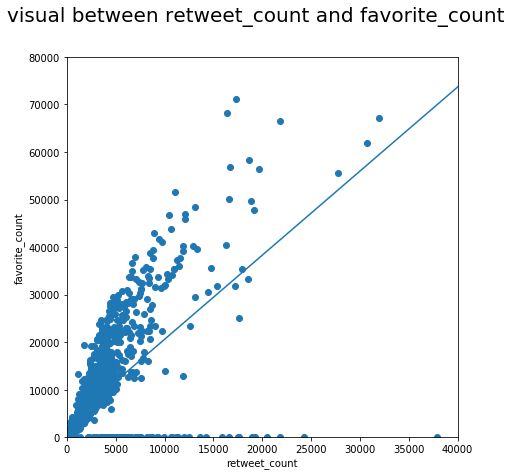

In [58]:
fig = plt.figure(figsize=(7, 7))
fig.suptitle('visual between retweet_count and favorite_count', fontsize=20)
plt.scatter(Twitter_archive_master['retweet_count'],Twitter_archive_master['favorite_count'] )
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.xlim([0, 40000])
plt.ylim([0, 80000])
plt.plot(np.unique(Twitter_archive_master['retweet_count']),
         np.poly1d(np.polyfit(Twitter_archive_master['retweet_count'],
                              Twitter_archive_master['favorite_count'],
                              1))(np.unique(Twitter_archive_master['retweet_count'])))
plt.show()

# visual between retweet_count and prediction


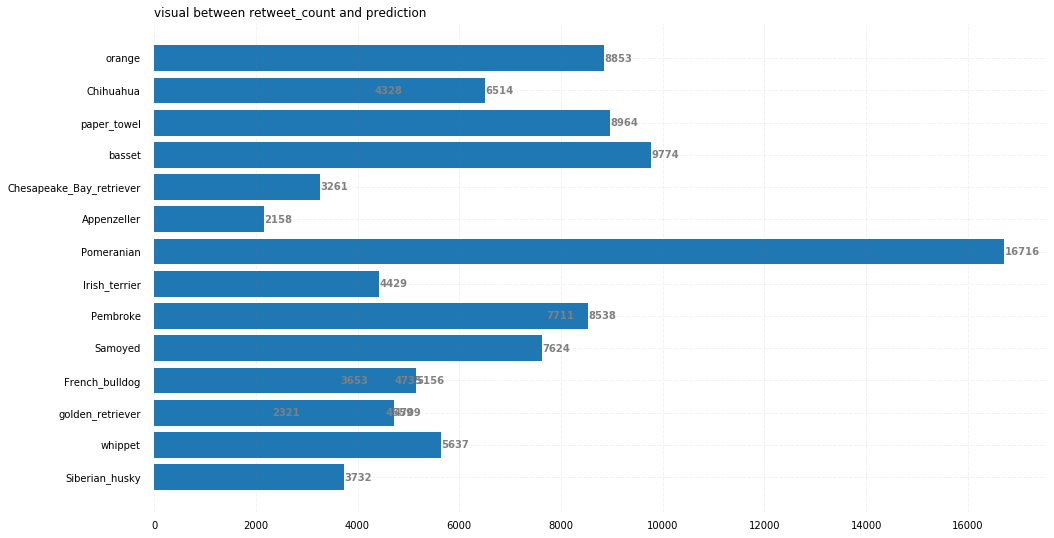

In [59]:
prediction = Twitter_archive_master['prediction'].head(20) 
retweet_count = Twitter_archive_master['retweet_count'].head(20) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(prediction, retweet_count) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('visual between retweet_count and prediction ', 
             loc ='left', ) 

# Show Plot 
plt.show() 

# Data analysis by a function describe()

In [60]:
Twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,prediction_level,confidence
count,1878.000000,1878.0,1878.000000,1878.000000,1878.000000,1878.0,1878.000000
mean,11.705005,10.0,2515.661342,7398.428647,1.200745,1.0,0.593976
std,41.875380,0.0,4311.057184,10578.488991,0.557469,0.0,0.272822
min,0.000000,10.0,16.000000,0.000000,1.000000,1.0,0.044333
25%,10.000000,10.0,598.250000,1505.500000,1.000000,1.0,0.359847
50%,11.000000,10.0,1272.000000,3555.000000,1.000000,1.0,0.591652
75%,12.000000,10.0,2905.250000,9043.250000,1.000000,1.0,0.844920
max,1776.000000,10.0,79515.000000,132810.000000,4.000000,1.0,0.999984


# visual between retweet_count and rating_numerator

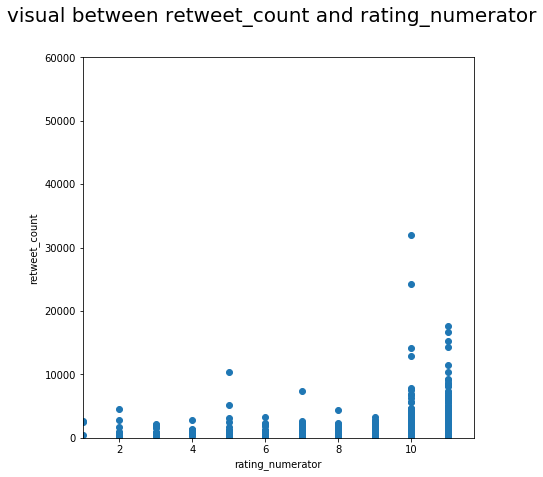

In [61]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(Twitter_archive_master['rating_numerator'],Twitter_archive_master['retweet_count'])
plt.xlabel('rating_numerator')
plt.ylabel('retweet_count')
plt.xlim([1, Twitter_archive_master['rating_numerator'].mean()])
plt.ylim([0, 60000])
fig.suptitle('visual between retweet_count and rating_numerator', fontsize=20)
plt.show()


# visual between favorite_count and rating_numerator

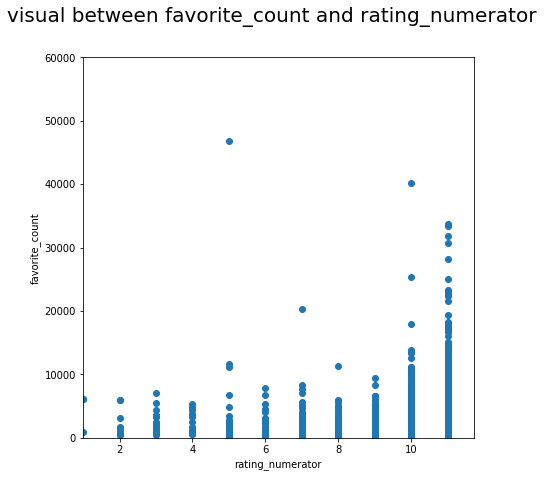

In [62]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(Twitter_archive_master['rating_numerator'],Twitter_archive_master['favorite_count'] )
plt.xlabel('rating_numerator')
plt.ylabel('favorite_count')
plt.xlim([1, Twitter_archive_master['rating_numerator'].mean()])
plt.ylim([0, 60000])
fig.suptitle('visual between favorite_count and rating_numerator', fontsize=20)
plt.show()

# Statistics about retweets_count in the year (2016)

In [63]:
data_2016 = Twitter_archive_master[Twitter_archive_master['timestamp'].dt.year == 2016]

In [64]:
sum_retweets={}
for month in data_2016['timestamp'].dt.month:
    sum_retweets[month]=np.sum(data_2016[data_2016['timestamp'].dt.month==month]['retweet_count'])

In [65]:
sum_retweets_list= list(sum_retweets.values())

In [66]:
val_list = list(sum_retweets.values())
key_list = list(sum_retweets.keys())

mean_value = np.mean(sum_retweets_list)

max_value = max(sum_retweets_list)
min_value = min(sum_retweets_list)
quartile_1 = np.percentile(sum_retweets_list, 25, interpolation="nearest")
quartile_3 = np.percentile(sum_retweets_list, 75, interpolation="nearest")
quartile_2 = np.percentile(sum_retweets_list, 50, interpolation="nearest")

In [67]:
pos_max = key_list[val_list.index(max_value)]
pos_min = key_list[val_list.index(min_value)]
pos_quartile_1 = key_list[val_list.index(quartile_1)]
pos_quartile_2 = key_list[val_list.index(quartile_2)]
pos_quartile_3 = key_list[val_list.index(quartile_3)]

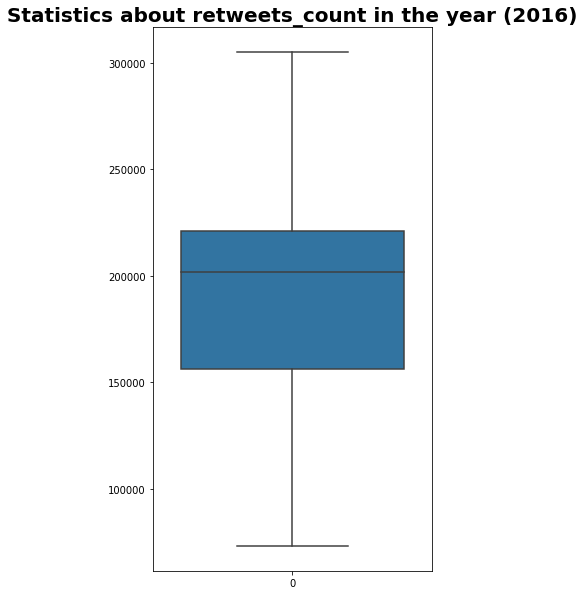

In [68]:
data_values = [min_value, quartile_1, quartile_2, quartile_3, max_value]
fig, ax = plt.subplots(figsize=(5,10))
ax.set_title('Statistics about retweets_count in the year (2016)', fontsize = 20, fontweight ='bold') 
ax = seaborn.boxplot(data=data_values, orient="v",ax=ax)

# Statistics about favorite_count in the year (2016)

In [69]:
sum_retweets={}
for month in data_2016['timestamp'].dt.month:
    sum_retweets[month]=np.sum(data_2016[data_2016['timestamp'].dt.month==month]['favorite_count'])

In [70]:
sum_retweets_list= list(sum_retweets.values())

In [71]:
val_list = list(sum_retweets.values())
key_list = list(sum_retweets.keys())
mean_value = np.mean(sum_retweets_list)
max_value = max(sum_retweets_list)
min_value = min(sum_retweets_list)
quartile_1 = np.percentile(sum_retweets_list, 25, interpolation="nearest")
quartile_3 = np.percentile(sum_retweets_list, 75, interpolation="nearest")
quartile_2 = np.percentile(sum_retweets_list, 50, interpolation="nearest")

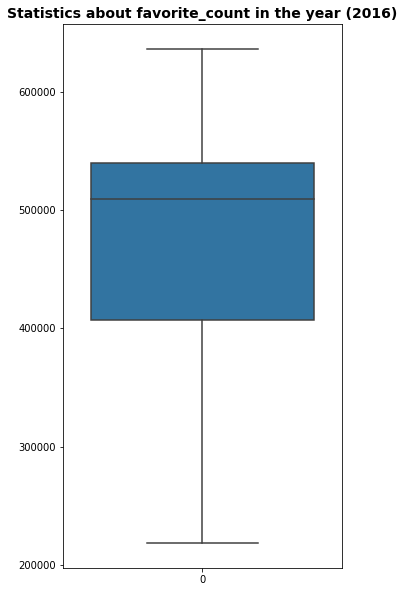

In [72]:
data_values = [min_value, quartile_1, quartile_2, quartile_3, max_value]
fig, ax = plt.subplots(figsize=(5,10))
ax.set_title('Statistics about favorite_count in the year (2016)', fontsize = 14, fontweight ='bold') 
ax = seaborn.boxplot(data=data_values, orient="v",ax=ax)

# visual between favorite_count and prediction

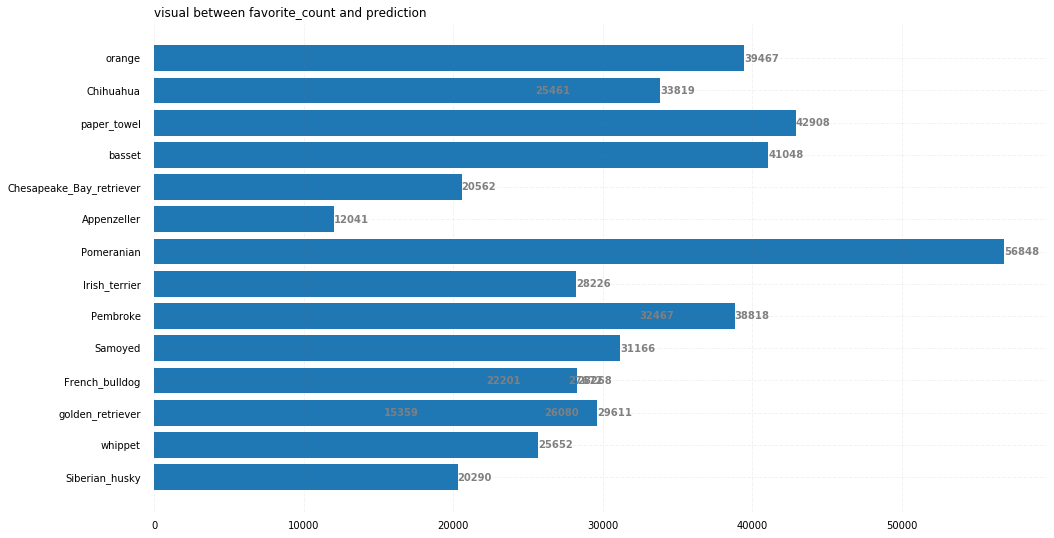

In [73]:
prediction = Twitter_archive_master['prediction'].head(20) 
retweet_count = Twitter_archive_master['favorite_count'].head(20) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(prediction, retweet_count) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('visual between favorite_count and prediction ', 
             loc ='left', ) 

# Show Plot 
plt.show() 

# 6 dogs prediction

In [74]:
Twitter_rating_prediction = Twitter_archive_master[['rating_numerator','rating_denominator','prediction']]

In [75]:
Twitter_rating_prediction['rating']=Twitter_archive_master['rating_numerator']/Twitter_archive_master['rating_denominator']

C:\Users\FadyMaher\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
Twitter_rating_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1877
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    1878 non-null   int64  
 1   rating_denominator  1878 non-null   int64  
 2   prediction          1878 non-null   object 
 3   rating              1878 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 73.4+ KB


In [77]:
Twitter_rating_prediction.sort_values(by=['rating'], inplace=True)

C:\Users\FadyMaher\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
Twitter_rating_prediction.tail(6)

,rating_numerator,rating_denominator,prediction,rating
127,14,10,chimpanzee,1.4
211,15,10,web_site,1.5
1299,26,10,kuvasz,2.6
536,27,10,clumber,2.7
1614,420,10,microphone,42.0
698,1776,10,bow_tie,177.6


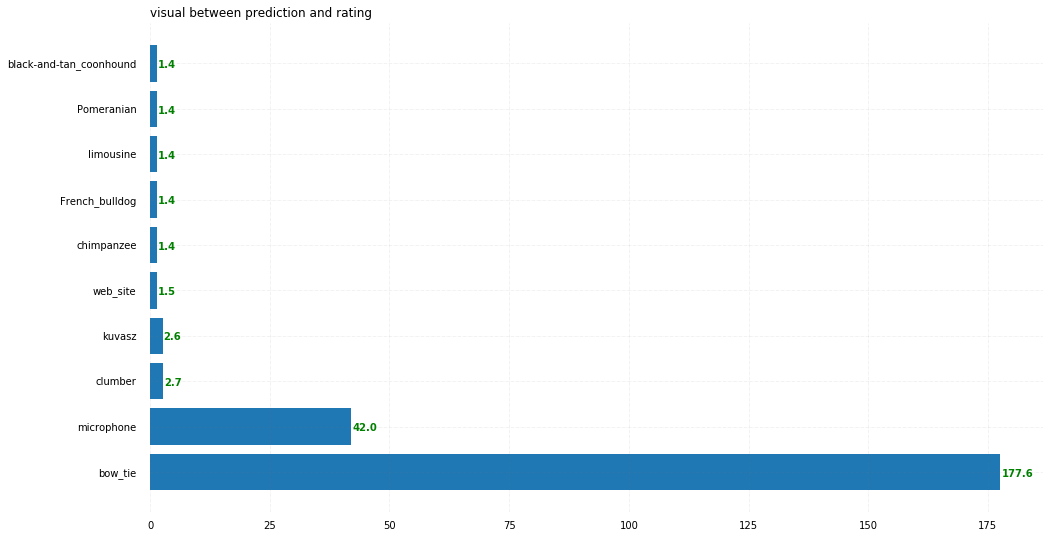

In [79]:
prediction = Twitter_rating_prediction['prediction'].tail(10)
rating = Twitter_rating_prediction['rating'].tail(10) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(prediction, rating) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='green')
  
# Add Plot Title 
ax.set_title('visual between prediction and rating ', 
             loc ='left') 

# Show Plot 
plt.show() 

# visual between dog_stage and retweet_count

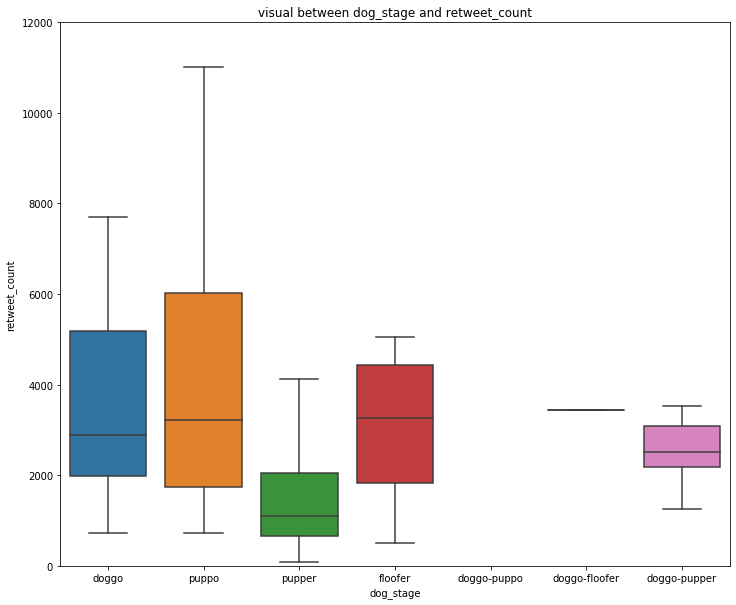

In [80]:
fig, ax = plt.subplots()
ax.set_title('visual between dog_stage and retweet_count')
fig.set_size_inches((12,10))
seaborn.boxplot(x='dog_stage',y='retweet_count',data=Twitter_archive_master,ax=ax,showfliers=False)
plt.ylim([0, 12000])
plt.show()